CNN+BI LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical


In [3]:
# Load data
data_path = "/content/drive/MyDrive/ISRUC.csv"
df = pd.read_csv(data_path)  # ✅ no quotes around the variable name


In [13]:

# Select features and label
features = ['SpO2', 'HR', 'Stage', 'BPOS', 'Events']
target = 'Classification'

# Convert to numpy arrays
X = df[features].values
y = df[target].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape to (samples, timesteps, features) - let's assume 10-epoch window
def create_sequences(X, y, window_size=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, window_size=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9224 - loss: 0.2514 - val_accuracy: 0.9273 - val_loss: 0.2010
Epoch 2/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.9270 - loss: 0.1968 - val_accuracy: 0.9280 - val_loss: 0.1888
Epoch 3/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9291 - loss: 0.1838 - val_accuracy: 0.9354 - val_loss: 0.1707
Epoch 4/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9329 - loss: 0.1723 - val_accuracy: 0.9365 - val_loss: 0.1691
Epoch 5/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9370 - loss: 0.1621 - val_accuracy: 0.9362 - val_loss: 0.1551
Epoch 6/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9382 - loss: 0.1540 - val_accuracy: 0.9403 - val_loss: 0.1488
Epoch 7/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9397 - loss: 0.1459 - val_accuracy: 0.9419 - val_loss: 0.1391
Epoch 8/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9412 - loss: 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8538    0.6216    0.7195      1776
           1     0.9686    0.9910    0.9796     20892

    accuracy                         0.9620     22668
   macro avg     0.9112    0.8063    0.8495     22668
weighted avg     0.9596    0.9620    0.9592     22668


Confusion Matrix:
[[ 1104   672]
 [  189 20703]]


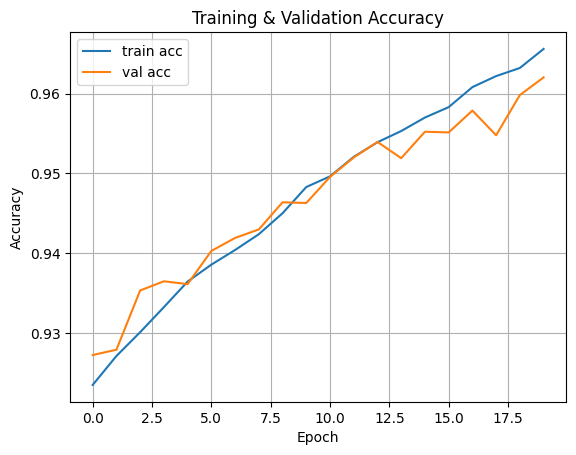

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training & Validation Accuracy')
plt.show()


CNN+Transformer

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define input features and target
features = ['SpO2', 'HR', 'Stage', 'BPOS', 'Events']
target = 'Classification'

X = df[features].values
y = df[target].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === STEP 3: Create Sequences (10 time steps per sample) ===
def create_sequences(X, y, window_size=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, window_size=10)

# === STEP 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dropout, Dense,
    LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Add
)

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

# Model Input
input_shape = X_train.shape[1:]  # (time_steps=10, features=5)
inputs = Input(shape=input_shape)

# CNN Block
x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# Transformer Block
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)

# Final Layers
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

# Build Model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 8, 64)     │      1,024 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 4, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4, 64)     │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 4, 64)     │        128 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 4, 64)     │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 4, 64)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 4, 64)     │          0 │ dropout_2[0][0],  │
│                     │                   │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 4, 64)     │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 4, 128)    │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 4, 128)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4, 64)     │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 4, 64)     │          0 │ dense_1[0][0],    │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,160 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 88,449 (345.50 KB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.9204 - loss: 0.2604 - val_accuracy: 0.9217 - val_loss: 0.2187
Epoch 2/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.9231 - loss: 0.2211 - val_accuracy: 0.9246 - val_loss: 0.2154
Epoch 3/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9226 - loss: 0.2131 - val_accuracy: 0.9246 - val_loss: 0.2005
Epoch 4/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - accuracy: 0.9235 - loss: 0.2081 - val_accuracy: 0.9278 - val_loss: 0.1902
Epoch 5/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9258 - loss: 0.1987 - val_accuracy: 0.9296 - val_loss: 0.1849
Epoch 6/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9254 - loss: 0.1975 - val_accuracy: 0.9289 - val_loss: 0.1809
Epoch 7/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.9257 - loss: 0.1929 - val_accuracy: 0.9299 - val_loss: 0.1760
Epoch 8/20
2834/2834 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - accuracy: 0.9269 -

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8203    0.2827    0.4204      1776
           1     0.9422    0.9947    0.9678     20892

    accuracy                         0.9389     22668
   macro avg     0.8812    0.6387    0.6941     22668
weighted avg     0.9327    0.9389    0.9249     22668


Confusion Matrix:
[[  502  1274]
 [  110 20782]]


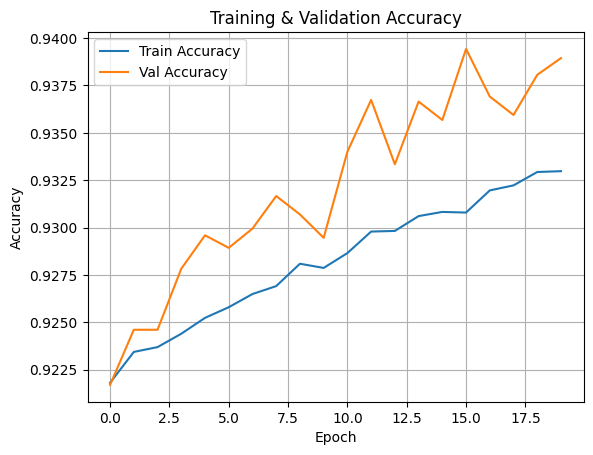

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
